Проверка

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data.csv', skipfooter=5, engine='python')
df

,Country Name,Country Code,Series Name,Series Code,2024 [YR2024],2023 [YR2023],2022 [YR2022],2021 [YR2021],2020 [YR2020],2019 [YR2019],...,1969 [YR1969],1968 [YR1968],1967 [YR1967],1966 [YR1966],1965 [YR1965],1964 [YR1964],1963 [YR1963],1962 [YR1962],1961 [YR1961],1960 [YR1960]
0,World,WLD,"Population, total",SP.POP.TOTL,8142056446,8064976601,7990399768,7920861888,7855075060,7778303912,...,3604815552,3530703561,3459015356,3389087189,3318997522,3251253200,3184063049,3117372187,3062768116,3021512598
1,World,WLD,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,49.720940485403,49.7090938984064,49.6968409791225,49.6879141492495,49.6726759319373,49.6644661997728,...,50.0153909775721,50.0242058938275,50.0306621136238,50.0374012265362,50.0462145959938,50.057772597255,50.0723542498722,50.0874204611387,50.097862877634,50.1014286800275
2,World,WLD,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,..,16.3327648376098,16.5567442314174,16.8437566819204,17.1491582639446,17.8031443074795,...,32.8215760699129,33.31704877056,33.1903954191732,33.4763322767604,34.5165843533564,35.1867341754549,36.3474563845187,35.1632445830402,31.2341888501891,31.9992347613353
3,World,WLD,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,..,7.57875299565788,7.70740462027798,8.71260338990372,8.01146403762778,7.468179369352,...,12.2260828851215,12.3868564238268,12.6248516968463,12.9112368139789,13.3335515550382,13.5207577307396,13.4290583745492,13.5844076991565,14.5595576375874,17.2114690145631
4,World,WLD,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,..,2.19582603257397,2.21514971296506,2.24573573357195,2.27638060434278,2.35323784811332,...,4.88003252839929,4.97825772929304,4.86580781697261,4.96824850941136,5.08093194731238,5.13081514120538,5.31430470898607,5.02406253709377,4.56475472574651,4.68612947945316
5,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,..,73.3297162833404,72.9690157226638,71.2154841745704,72.1822239463873,72.8689103086688,...,57.6800785564019,57.3352975180805,56.9037526493978,56.4490075635883,55.926447643924,56.0966979719764,55.6522285444853,55.2860734026534,52.7972301278289,50.9418860745353
6,World,WLD,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,..,27.1,28,28.1,28.5,28.9,...,..,..,..,..,..,..,..,..,..,..
7,World,WLD,Population growth (annual %),SP.POP.GROW,0.95119724803841,0.929001820256677,0.87407679206444,0.834019678889311,0.982151910510213,1.04436974995153,...,2.07734447832581,2.05131907724086,2.04233500264312,2.08978332249744,2.0622264110062,2.08824524093807,2.11676704326362,1.76712790546867,1.35615538573255,..
8,World,WLD,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,24.7262356323755,25.0437186765879,25.3453926748796,25.6066173001413,25.8315084265701,26.0365830261538,...,37.8410091649078,37.9077210047276,37.9808877864873,38.0433528061241,38.0303884227707,37.9664516558849,37.787951398339,37.563933284623,37.4692001388481,37.398947202015
9,World,WLD,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,65.0730251006191,64.9749802281763,64.9156756903772,64.866574625801,64.837637448982,64.8587194013205,...,56.9197035238378,56.8922994598399,56.860973432274,56.8394713857178,56.8918666890537,56.9905441911528,57.18766795986,57.4255483623954,57.5412121009554,57.6310744053493


In [4]:
year_columns = [col for col in df.columns if '[YR' in col]
rename_map = {
    # Ключ: оригинальное имя колонки
    col: re.sub(r' \[YR\d{4}\]', '', col)
    # Значение: удаляем паттерн " [YRXXXX]"
    for col in year_columns
}
df_renamed = df.rename(columns=rename_map)

In [5]:
df = df.rename(columns=rename_map)

In [6]:
# Превращаем таблицу в длинный формат
df_long = df.melt(
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], # То, что НЕ меняется
    var_name='Year',  # Как назвать колонку, куда упадут заголовки (бывшие 2020, 2021...)
    value_name='Value' # Как назвать колонку, куда упадут цифры
)

# Превращаем год в число (так как имена колонок были строками)
df_long['Year'] = df_long['Year'].astype(int)
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')
# Смотрим результат
print(df_long.head())

  Country Name Country Code                                 Series Name  \
0        World          WLD                           Population, total   
1        World          WLD  Population, female (% of total population)   
2        World          WLD        Birth rate, crude (per 1,000 people)   
3        World          WLD        Death rate, crude (per 1,000 people)   
4        World          WLD    Fertility rate, total (births per woman)   

         Series Code  Year         Value  
0        SP.POP.TOTL  2024  8.142056e+09  
1  SP.POP.TOTL.FE.ZS  2024  4.972094e+01  
2     SP.DYN.CBRT.IN  2024           NaN  
3     SP.DYN.CDRT.IN  2024           NaN  
4     SP.DYN.TFRT.IN  2024           NaN  


In [7]:
df_long.head(10)

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,World,WLD,"Population, total",SP.POP.TOTL,2024,8.142056e+09
1,World,WLD,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,2024,4.972094e+01
2,World,WLD,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2024,NaN
3,World,WLD,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,2024,NaN
4,World,WLD,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2024,NaN
5,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2024,NaN
6,World,WLD,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,2024,NaN
7,World,WLD,Population growth (annual %),SP.POP.GROW,2024,9.511972e-01
8,World,WLD,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,2024,2.472624e+01
9,World,WLD,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,2024,6.507303e+01


In [8]:
df_long['Country Name'].nunique()

1

In [9]:
muss = df_long['Value'].isna().mean() * 100
muss


np.float64(25.34412955465587)

In [10]:
missing = df_long.isna().sum()

In [11]:
missing

Country Name      0
Country Code      0
Series Name       0
Series Code       0
Year              0
Value           313
dtype: int64

In [12]:
df_long.shape

(1235, 6)

In [13]:
#Missing_Count это количество пропущенных значений
#Missing_Pct это процент пропущенных значений
missing_stats = df_long.groupby('Series Name')['Value'].agg(
    Missing_Count = lambda x: x.isna().sum(),
    Missing_Pct = lambda x: x.isna().mean() * 100
).sort_values(by='Missing_Pct', ascending=False)
print(missing_stats)

                                                    Missing_Count  Missing_Pct
Series Name                                                                   
Contraceptive prevalence, any method (% of marr...             63    96.923077
Current health expenditure per capita, PPP (cur...             42    64.615385
People using at least basic drinking water serv...             42    64.615385
Government expenditure on education, total (% o...             40    61.538462
Mortality rate, infant (per 1,000 live births)                 31    47.692308
Labor force, total                                             30    46.153846
GDP per capita, PPP (current international $)                  30    46.153846
Prevalence of HIV, total (% of population ages ...             30    46.153846
Birth rate, crude (per 1,000 people)                            1     1.538462
Death rate, crude (per 1,000 people)                            1     1.538462
Fertility rate, total (births per woman)            

1. Группа "Идеальные" (1.5% пропусков)
Кто это: Birth rate, Death rate, Life expectancy, Population growth.

Почему 1.5%? Это ровно 1 год из 65 (1/65 ≈ 1.5%).

Какой год пропущен? Это 2024 год.

Вывод: Это супер-качественные данные. Они есть с 1960 по 2023 год. Пропуск в 2024 году абсолютно нормален — год еще не закончился или данные еще обрабатываются.

2. Группа "Новая эпоха" (~46% пропусков)
Кто это: GDP per capita (ВВП), Labor force (Рабочая сила), HIV (ВИЧ).

Почему 46%? Это ровно 30 лет (1960–1989).

История: Данные по ВВП (по паритету покупательной способности) и ВИЧ начали системно собирать только с 1990 года.

Вывод: Если ты будешь строить график ВВП, он начнется с 1990 года. Не пытайся заполнить 1960–1989 годы — этих данных просто не существует в таком формате.

3. Группа "Эпизодические" (97% пропусков)
Кто это: Contraceptive prevalence.

Почему 97%? Данные есть всего за 2 года (обычно это годы больших переписей или опросов, например 2000 и 2010).

Вывод: Этот показатель нельзя использовать для временных рядов (line chart). Его можно использовать только как "точечное" сравнение. Для проекта с графиками по годам этот столбец лучше удалить.

In [14]:
# Фильтруем данные, оставляя только с 1990 года
# Так как данных до 1990 года очень много пропущено
df_recent = df_long[df_long['Year'] >= 1990]

In [15]:
missing_stats = df_recent.groupby('Series Name')['Value'].agg(
    Missing_Count = lambda x: x.isna().sum(),
    Missing_Pct = lambda x: x.isna().mean() * 100
).sort_values(by='Missing_Pct', ascending=False)
print(missing_stats)

                                                    Missing_Count  Missing_Pct
Series Name                                                                   
Contraceptive prevalence, any method (% of marr...             33    94.285714
Current health expenditure per capita, PPP (cur...             12    34.285714
People using at least basic drinking water serv...             12    34.285714
Government expenditure on education, total (% o...             10    28.571429
Birth rate, crude (per 1,000 people)                            1     2.857143
Fertility rate, total (births per woman)                        1     2.857143
Death rate, crude (per 1,000 people)                            1     2.857143
Mortality rate, infant (per 1,000 live births)                  1     2.857143
Life expectancy at birth, total (years)                         1     2.857143
GDP per capita, PPP (current international $)                   0     0.000000
Labor force, total                                  

In [16]:
df_final = df_recent[df_recent['Series Name'] != 'Contraceptive prevalence, any method (% of married women ages 15-49)'].copy()

In [17]:
df_final['Value'] = df_final.groupby('Series Name')['Value'].ffill()

In [18]:
missing_stats_final = df_final.groupby('Series Name')['Value'].agg(
    Missing_Count = lambda x: x.isna().sum(),
    Missing_Pct = lambda x: x.isna().mean() * 100
).sort_values(by='Missing_Pct', ascending=False)

print("✅ Статистика пропусков после очистки:")
print(missing_stats_final)

✅ Статистика пропусков после очистки:
                                                    Missing_Count  Missing_Pct
Series Name                                                                   
Current health expenditure per capita, PPP (cur...              2     5.714286
People using at least basic drinking water serv...              2     5.714286
Birth rate, crude (per 1,000 people)                            1     2.857143
Death rate, crude (per 1,000 people)                            1     2.857143
Government expenditure on education, total (% o...              1     2.857143
Fertility rate, total (births per woman)                        1     2.857143
Mortality rate, infant (per 1,000 live births)                  1     2.857143
Life expectancy at birth, total (years)                         1     2.857143
GDP per capita, PPP (current international $)                   0     0.000000
Labor force, total                                              0     0.000000
Population age

In [19]:
df_final['Value'] = df_final.groupby('Series Name')['Value'].bfill()

In [20]:
missing_stats_final = df_final.groupby('Series Name')['Value'].agg(
    Missing_Count = lambda x: x.isna().sum(),
    Missing_Pct = lambda x: x.isna().mean() * 100
).sort_values(by='Missing_Pct', ascending=False)

print("✅ Статистика пропусков после очистки:")
print(missing_stats_final)

✅ Статистика пропусков после очистки:
                                                    Missing_Count  Missing_Pct
Series Name                                                                   
Birth rate, crude (per 1,000 people)                            0          0.0
Current health expenditure per capita, PPP (cur...              0          0.0
Death rate, crude (per 1,000 people)                            0          0.0
Fertility rate, total (births per woman)                        0          0.0
GDP per capita, PPP (current international $)                   0          0.0
Government expenditure on education, total (% o...              0          0.0
Labor force, total                                              0          0.0
Life expectancy at birth, total (years)                         0          0.0
Mortality rate, infant (per 1,000 live births)                  0          0.0
People using at least basic drinking water serv...              0          0.0
Population age

#Дальше идем делать графики

In [21]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [22]:
pop_data = df_final[df_final['Series Code'] == 'SP.POP.TOTL']


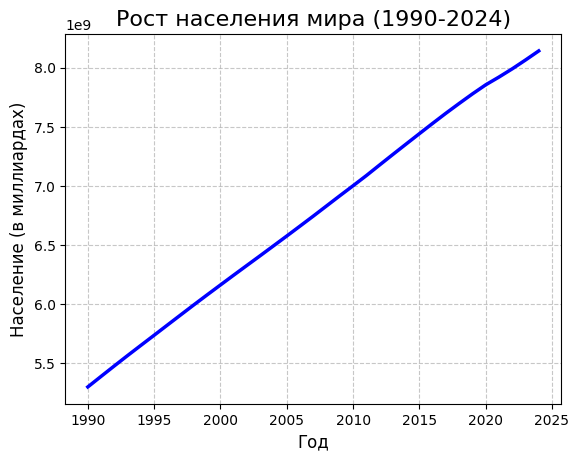

In [23]:
sns.lineplot(data=pop_data, x='Year', y='Value', linewidth=2.5, color='blue')
plt.title('Рост населения мира (1990-2024)', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Население (в миллиардах)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) # Сетка

# Показываем
plt.show()

In [24]:
rates_data = df_final[df_final['Series Code'].isin(['SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN'])]

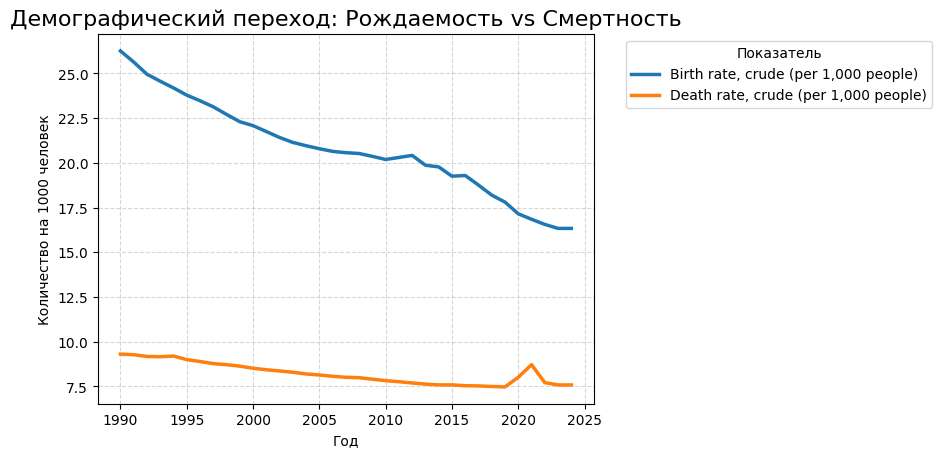

In [25]:
sns.lineplot(data=rates_data, x='Year', y='Value', hue='Series Name', linewidth=2.5)
plt.title('Демографический переход: Рождаемость vs Смертность', fontsize=16)
plt.xlabel('Год')
plt.ylabel('Количество на 1000 человек')
plt.grid(True, linestyle='--', alpha=0.5)

# Выносим легенду вбок, чтобы она не перекрывала график
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Показатель')

plt.show()

In [26]:
if len(pop_data) == 0:
    print("\nДоступные коды в df_final:")
    print(df_final['Series Code'].unique())

In [27]:
df_final

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,World,WLD,"Population, total",SP.POP.TOTL,2024,8.142056e+09
1,World,WLD,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,2024,4.972094e+01
2,World,WLD,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2024,1.633276e+01
3,World,WLD,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,2024,7.578753e+00
4,World,WLD,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2024,2.195826e+00
...,...,...,...,...,...,...
659,World,WLD,"Labor force, total",SL.TLF.TOTL.IN,1990,2.326447e+09
660,World,WLD,People using at least basic drinking water ser...,SH.H2O.BASW.ZS,1990,8.023660e+01
662,World,WLD,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,1990,3.000000e-01
663,World,WLD,"Current health expenditure per capita, PPP (cu...",SH.XPD.CHEX.PP.CD,1990,5.926562e+02


Корреляционный анализ

In [28]:
df_pivot = df_final.pivot(index='Year', columns='Series Name', values='Value')
print(df_pivot.head())

Series Name  Birth rate, crude (per 1,000 people)  \
Year                                                
1990                                    26.258799   
1991                                    25.637981   
1992                                    24.956394   
1993                                    24.564328   
1994                                    24.191089   

Series Name  Current health expenditure per capita, PPP (current international $)  \
Year                                                                                
1990                                                592.656213                      
1991                                                592.656213                      
1992                                                592.656213                      
1993                                                592.656213                      
1994                                                592.656213                      

Series Name  Death rate, crude (

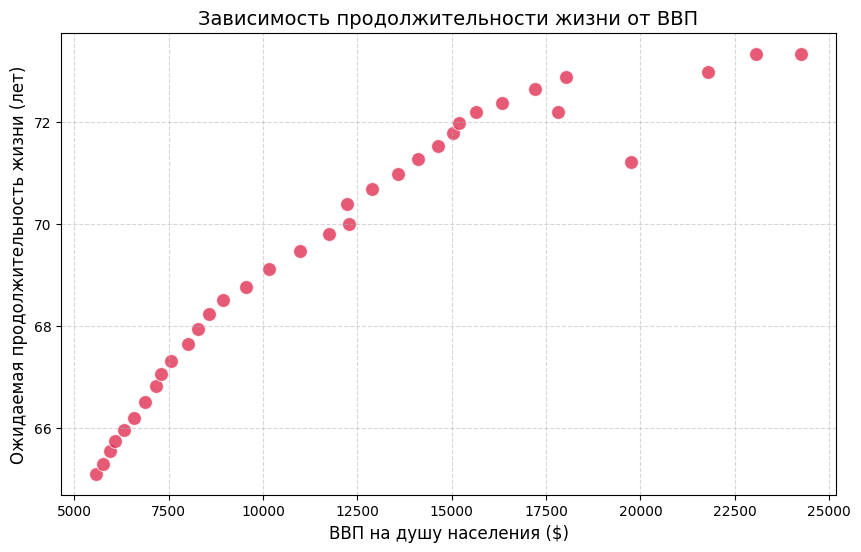

In [29]:
plt.figure(figsize=(10, 6))

x_col = 'GDP per capita, PPP (current international $)'
y_col = 'Life expectancy at birth, total (years)'

# Рисуем точечный график
sns.scatterplot(data=df_pivot, x=x_col, y=y_col, s=100, color='crimson', alpha=0.7)

plt.title('Зависимость продолжительности жизни от ВВП', fontsize=14)
plt.xlabel('ВВП на душу населения ($)', fontsize=12)
plt.ylabel('Ожидаемая продолжительность жизни (лет)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [30]:
corr_matrix = df_pivot.corr()

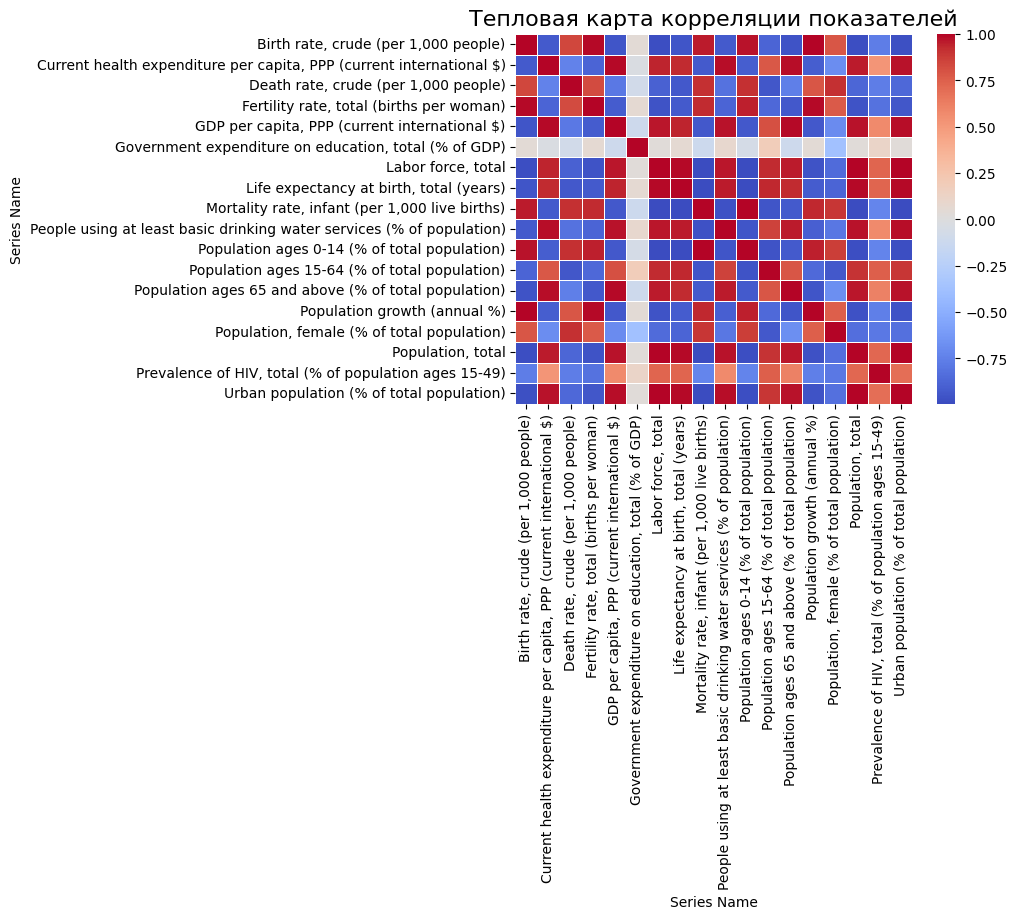

In [31]:
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Тепловая карта корреляции показателей', fontsize=16)
plt.show()

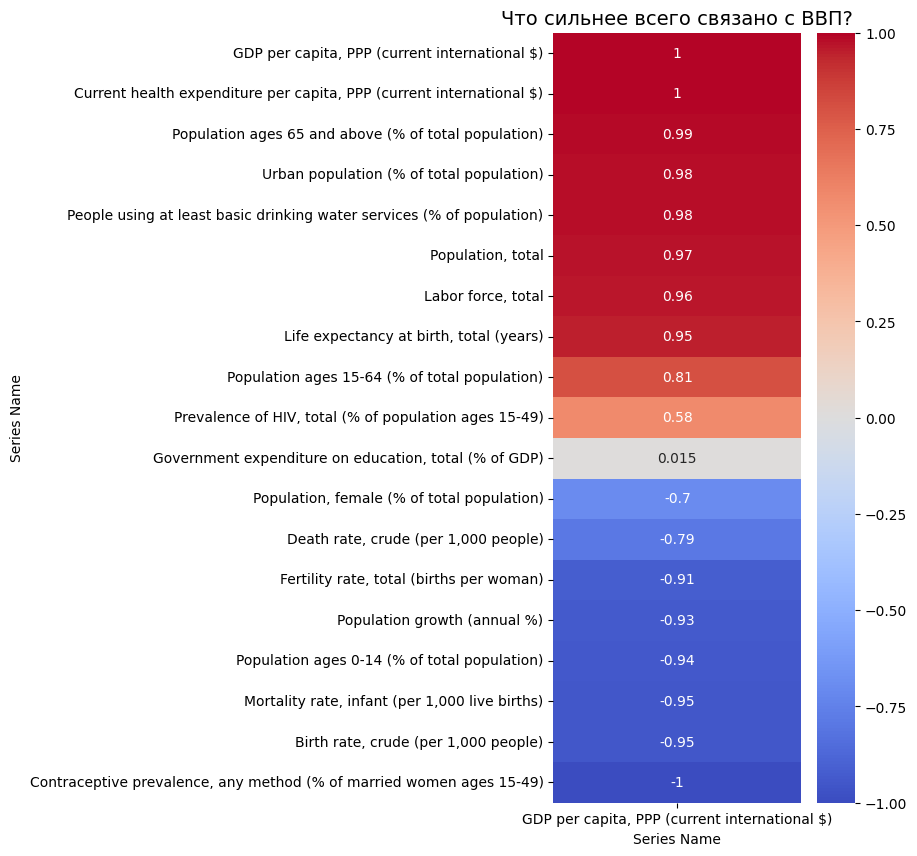

In [ ]:

# Выбираем целевую переменную ВВП
target_col = 'GDP per capita, PPP (current international $)'

# Сортируем связи от самых сильных к самым слабым
gdp_corr = corr_matrix[[target_col]].sort_values(by=target_col, ascending=False)

# Рисуем Heatmap только для одного столбца
plt.figure(figsize=(4, 10)) # Делаем узкую высокую картинку
sns.heatmap(gdp_corr, 
            annot=True,     # Показываем числа на ячейках
            cmap='coolwarm', 
            center=0,
            vmin=-1, vmax=1) # Фиксируем шкалу от -1 до +1

plt.title(f'Что сильнее всего связано с ВВП?', fontsize=14)
plt.show()

"Корреляция не означает причинно-следственную связь" (Correlation does not imply causation).
Анализ подтверждает теорию демографического перехода: рост экономического благосостояния (ВВП) имеет сильнейшую обратную связь с рождаемостью и прямую связь с качеством и продолжительностью жизни